In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns

import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn import metrics 

from FinalModels import DNN,CNN,RNN_LSTM,SVM

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# Set seeds for reproducibility of results 
tf.random.set_seed(42)
np.random.seed(42)

*Table of Contents*:

1. **Data**
    1. NSL-KDD Data 
    2. CSE-CSE-IDS2018 Data
    
    
2. **Model Training**
    1. Deep Neural Network 
    2. Convolutional Neural Network
    3. Long Short Term Memory Recurrent Neural Network 
    
    
3. **Model Comparison**
    1. NSL-KDD Comparison
    2. CSE-CIC-IDS2018 Comparison 
    
    
4. **Dimensionality Reduction using AutoEncoder**
    1. Deep Neural Network with AutoEncoder
    2. Convolutional Neural Network with AutoEncoder 
    3. Comparison with Original Models on the CSE-CIC-IDS2018 Dataset

## NSL-KDD Data 

In [3]:
# Data is already divided into train and test sets by providers
train_data = pd.read_csv("DATA/NSLKDD/nslkdd_train_cleaned.csv")
test_data = pd.read_csv("DATA/NSLKDD/nslkdd_test_cleaned.csv")

nsl_X_train = train_data.drop("target",axis=1).values
nsl_y_train = train_data["target"].values

nsl_X_test = test_data.drop("target",axis=1).values
nsl_y_test = test_data["target"].values

print(nsl_X_train.shape[0], 'training records',nsl_X_train.shape[1],'features')
print(nsl_X_test.shape[0], 'testing records',nsl_X_test.shape[1],'features')

125973 training records 121 features
22544 testing records 121 features


## CSE-CIC-IDS2018 Data

In [4]:
data = pd.read_csv("DATA/CIC/undersampled_cic.csv")

cic_X = data.drop("target",axis=1).values
cic_y = data["target"].values

print(cic_X.shape[0], 'records',cic_X.shape[1],'features')

6493 records 79 features


## Baseline - Support Vector Machine

In [6]:
cic_svm = SVM(cic_X,cic_y,split=True)
cic_svm.evaluate(5)

Model 0 Acc: 0.7987679671457906
Model 1 Acc: 0.7797741273100616
Model 2 Acc: 0.7864476386036962
Model 3 Acc: 0.7967145790554415
Model 4 Acc: 0.7987679671457906


In [7]:
nsl_svm = SVM(X = [nsl_X_train, nsl_X_test],y= [nsl_y_train,nsl_y_test], split=False)
nsl_svm.evaluate(5) 

Model 0 Acc: 0.7477821149751597
Model 1 Acc: 0.7477821149751597
Model 2 Acc: 0.7477821149751597
Model 3 Acc: 0.7477821149751597
Model 4 Acc: 0.7477821149751597


## Deep Neural Network

In [8]:
nsl_dnn = DNN(X = [nsl_X_train,nsl_X_test], y = [nsl_y_train,nsl_y_test], split=False)
nsl_dnn.evaluate_model(5,[64,32,16])

Training Model 0 ...


2021-11-09 20:20:59.141344: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:21:03.989180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 0 ...


2021-11-09 20:24:00.986806: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.7527058197303051
Training Model 1 ...


2021-11-09 20:24:02.711212: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:24:07.470587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 1 ...


2021-11-09 20:26:41.655645: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.7617991483321505
Training Model 2 ...


2021-11-09 20:26:43.176378: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:26:47.859745: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 2 ...


2021-11-09 20:29:23.302443: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 2 Acc: 0.7569198012775018
Training Model 3 ...


2021-11-09 20:29:24.819367: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:29:29.714057: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 3 ...


2021-11-09 20:31:30.819571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.771513484740951
Training Model 4 ...


2021-11-09 20:31:32.367464: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:31:37.053044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 4 ...


2021-11-09 20:35:06.189841: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.7633960255500355


In [14]:
cic_dnn = DNN(X = cic_X, y = cic_y, split = True)
cic_dnn.evaluate_model(5,[64,32,16], time=True)

Training Model 0 ...


2021-11-10 18:11:20.313836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:11:20.664376: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:11:35.338717: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:11:35.683416: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 0 ...


2021-11-10 18:11:47.594088: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.8249486652977412
Training Model 1 ...


2021-11-10 18:11:48.072845: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:11:48.420873: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:12:04.613191: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:12:04.959569: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 1 ...


2021-11-10 18:12:14.927630: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.8403490759753593
Training Model 2 ...


2021-11-10 18:12:15.415017: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:12:15.764126: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:12:31.070140: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:12:31.426079: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 2 ...


2021-11-10 18:12:49.239922: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 2 Acc: 0.8382956878850103
Training Model 3 ...


2021-11-10 18:12:49.724628: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:12:50.071703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:13:01.170369: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:13:01.519487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 3 ...


2021-11-10 18:13:18.103702: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.8536960985626283
Training Model 4 ...


2021-11-10 18:13:18.594279: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:13:18.950887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:13:30.408778: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:13:30.755821: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 4 ...


2021-11-10 18:13:44.111419: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.8583162217659137


## Convolutional Neural Network 

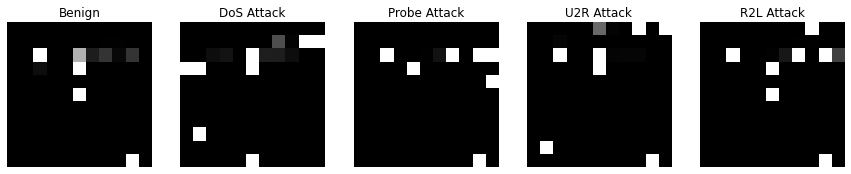

In [10]:
nsl_cnn = CNN(X = [nsl_X_train, nsl_X_test],y= [nsl_y_train,nsl_y_test], split=False, image_dim=11) # 121 Features = 11x11 Images 
nsl_cnn.display_class_image({0:'Benign', 1:'DoS Attack', 2:'Probe Attack', 3:'U2R Attack', 4:'R2L Attack'})

In [12]:
nsl_cnn.evaluate_model(5)

Training Model 0 ...


2021-11-09 20:48:18.551199: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:48:21.957040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 0 ...


2021-11-09 20:50:08.790854: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.7482256919801278
Training Model 1 ...


2021-11-09 20:50:10.452999: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:50:13.710446: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 1 ...


2021-11-09 20:51:56.976874: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.7492459190915542
Training Model 2 ...


2021-11-09 20:51:58.610447: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:52:01.828508: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 2 ...


2021-11-09 20:53:58.811084: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/homebrew/Caskroom/miniforge/base/envs/tensorflow/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Pre

Model 2 Acc: 0.7212562100780695
Training Model 3 ...


2021-11-09 20:54:00.477844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:54:03.707698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 3 ...


2021-11-09 20:55:54.065438: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.72138928317956
Training Model 4 ...


2021-11-09 20:55:55.708730: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 20:55:58.903072: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 4 ...


2021-11-09 20:57:07.699010: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.7649485450674237


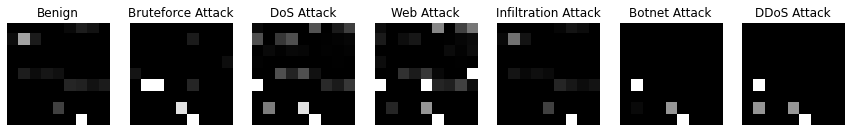

In [8]:
cic_cnn = CNN(X = cic_X, y = cic_y, split=True, image_dim=9) # 81 Features = 9x9 Images
cic_cnn.display_class_image({0:'Benign', 1:'Bruteforce Attack', 2:'DoS Attack', 3:'Web Attack', 4:'Infiltration Attack',
                         5: 'Botnet Attack', 6:'DDoS Attack'})

In [9]:
cic_cnn.evaluate_model(5,time=True)

Training Model 0 ...
Metal device set to: Apple M1


2021-11-10 18:02:48.533519: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2021-11-10 18:02:48.534187: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2021-11-10 18:02:48.864899: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2021-11-10 18:02:48.868610: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2021-11-10 18:02:49.024407: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:02:49.389274: I tensorflow/core/grappler/

Evaluating Model 0 ...


2021-11-10 18:03:09.636073: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.8413757700205339
Training Model 1 ...


2021-11-10 18:03:10.000851: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:10.226497: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:17.425254: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:17.719938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 1 ...


2021-11-10 18:03:32.114863: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.8552361396303901
Training Model 2 ...


2021-11-10 18:03:32.492139: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:32.715790: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:41.868552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:42.088660: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 2 ...
Model 2 Acc: 0.8439425051334702


2021-11-10 18:03:55.605186: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Training Model 3 ...


2021-11-10 18:03:55.955949: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:03:56.178046: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:04:07.445977: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:04:07.669754: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 3 ...


2021-11-10 18:04:19.057875: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.8336755646817249
Training Model 4 ...


2021-11-10 18:04:19.412459: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:04:19.638541: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:04:29.129109: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:04:29.353448: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 4 ...
Model 4 Acc: 0.8157084188911704


2021-11-10 18:04:39.299308: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


## LSTM

In [15]:
nsl_lstm = RNN_LSTM(X = [nsl_X_train, nsl_X_test],y= [nsl_y_train,nsl_y_test], split=False, num_of_classes=5)

In [16]:
nsl_lstm.evaluate_model(5)

Training Model 0 ...


2021-11-09 21:06:05.962026: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:06:11.349666: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping
Evaluating Model 0 ...


2021-11-09 21:09:10.830622: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.7715578424414479
Training Model 1 ...


2021-11-09 21:09:13.808733: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:09:18.942797: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00029: early stopping
Evaluating Model 1 ...


2021-11-09 21:11:47.333727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.7621096522356281
Training Model 2 ...


2021-11-09 21:11:50.642172: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:11:55.883545: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00033: early stopping
Evaluating Model 2 ...


2021-11-09 21:14:49.402546: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 2 Acc: 0.7529276082327893
Training Model 3 ...


2021-11-09 21:14:52.341698: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:14:57.388587: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00035: early stopping
Evaluating Model 3 ...


2021-11-09 21:17:58.121460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.7590933286018453
Training Model 4 ...


2021-11-09 21:18:00.952627: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:18:06.094343: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00024: early stopping
Evaluating Model 4 ...


2021-11-09 21:20:08.785792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.7609119943222143


In [10]:
cic_lstm = RNN_LSTM(X=cic_X, y = cic_y, split = True, num_of_classes=7)

In [11]:
cic_lstm.evaluate_model(5, time=True)

Training Model 0 ...


2021-11-10 18:08:05.548779: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:08:05.962253: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00078: early stopping


2021-11-10 18:08:22.747598: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:08:23.131180: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00063: early stopping
Evaluating Model 0 ...


2021-11-10 18:08:36.703141: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.8341889117043121
Training Model 1 ...


2021-11-10 18:08:37.458984: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:08:37.838842: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00073: early stopping


2021-11-10 18:08:53.487078: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:08:53.871551: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00069: early stopping
Evaluating Model 1 ...


2021-11-10 18:09:08.612411: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.8424024640657084
Training Model 2 ...


2021-11-10 18:09:09.346865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:09:09.734348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00068: early stopping


2021-11-10 18:09:24.634155: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:09:25.020082: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00081: early stopping
Evaluating Model 2 ...


2021-11-10 18:09:42.315159: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 2 Acc: 0.8336755646817249
Training Model 3 ...


2021-11-10 18:09:43.042044: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:09:43.426685: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00060: early stopping


2021-11-10 18:09:56.480122: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:09:56.861954: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00067: early stopping
Evaluating Model 3 ...


2021-11-10 18:10:11.033503: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.8480492813141683
Training Model 4 ...


2021-11-10 18:10:11.763297: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:10:12.144414: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00070: early stopping


2021-11-10 18:10:27.182316: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-10 18:10:27.559200: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Restoring model weights from the end of the best epoch.
Epoch 00059: early stopping
Evaluating Model 4 ...


2021-11-10 18:10:40.030272: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.8275154004106776


# MODEL COMPARISON 

### Plotting Function

In [12]:
def autolabel(rects, xpos='center', perc=True):
    ha = {'center': 'center', 'right': 'left', 'left': 'right'}
    offset = {'center': 0, 'right': 1, 'left': -1}

    for rect in rects:
        height = rect.get_height()
        if perc:
            ax.annotate('{}%'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 1),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom',
                        fontsize = 11)
        else:
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(offset[xpos]*3, 1),  # use 3 points offset
                        textcoords="offset points",  # in both directions
                        ha=ha[xpos], va='bottom',
                        fontsize = 11)

## NSL-KDD

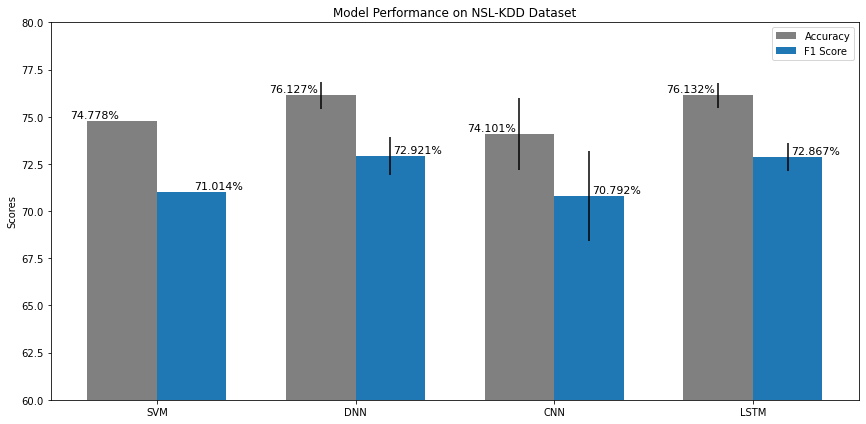

In [78]:
nsl_acc_means, nsl_acc_std = (round(nsl_svm.acc[0]*100,3), round(nsl_dnn.acc[0]*100,3), round(nsl_cnn.acc[0]*100,3), round(nsl_lstm.acc[0]*100,3)), \
                             (nsl_svm.acc[1]*100, nsl_dnn.acc[1]*100, nsl_cnn.acc[1]*100, nsl_lstm.acc[1]*100)
    
nsl_f1_means, nsl_f1_std = (round(nsl_svm.f1[0]*100,3),round(nsl_dnn.f1[0]*100,3), round(nsl_cnn.f1[0]*100,3), round(nsl_lstm.f1[0]*100,3)), \
                           (nsl_svm.f1[1]*100,nsl_dnn.f1[1]*100, nsl_cnn.f1[1]*100, nsl_lstm.f1[1]*100)
    
ind = np.arange(len(nsl_acc_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind - width/2, nsl_acc_means, width, yerr = nsl_acc_std,
                label='Accuracy', color='grey')
rects2 = ax.bar(ind + width/2, nsl_f1_means, width, yerr = nsl_f1_std,
                label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance on NSL-KDD Dataset')
ax.set_xticks(ind)
ax.set_xticklabels(('SVM','DNN', 'CNN', 'LSTM'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
plt.ylim(60,80)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("acc_f1_nsl-kdd.pdf")
plt.show()

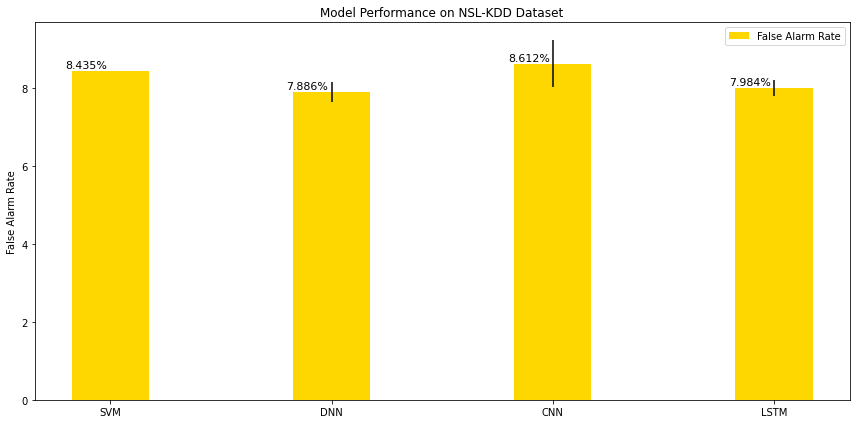

In [79]:
nsl_far_means, nsl_far_std = (round(nsl_svm.far[0]*100,3),round(nsl_dnn.far[0]*100,3), round(nsl_cnn.far[0]*100,3), round(nsl_lstm.far[0]*100,3)), \
                     (nsl_svm.far[1]*100,nsl_dnn.far[1]*100, nsl_cnn.far[1]*100, nsl_lstm.far[1]*100)

    
ind = np.arange(len(nsl_far_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind, nsl_far_means, width, yerr = nsl_far_std,
                label='False Alarm Rate', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('False Alarm Rate')
ax.set_title('Model Performance on NSL-KDD Dataset')
ax.set_xticks(ind)
ax.set_xticklabels(('SVM','DNN', 'CNN', 'LSTM'))
ax.legend()

autolabel(rects1, "left")
fig.tight_layout()

#plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("far_nsl-kdd.pdf")
plt.show()

## CSE-CIC-IDS2018

In [13]:
cic_acc_means, cic_acc_std = (round(cic_svm.acc[0]*100,3),round(cic_dnn.acc[0]*100,3), round(cic_cnn.acc[0]*100,3), round(cic_lstm.acc[0]*100,3)), \
                     (cic_svm.acc[1]*100,cic_dnn.acc[1]*100, cic_cnn.acc[1]*100, cic_lstm.acc[1]*100)
    
cic_f1_means, cic_f1_std = (round(cic_svm.f1[0]*100,3), round(cic_dnn.f1[0]*100,3), round(cic_cnn.f1[0]*100,3), round(cic_lstm.f1[0]*100,3)), \
                         (cic_svm.f1[1]*100, cic_dnn.f1[1]*100, cic_cnn.f1[1]*100, cic_lstm.f1[1]*100)
    
ind = np.arange(len(cic_acc_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind - width/2, cic_acc_means, width, yerr=cic_acc_std,
                label='Accuracy', color='grey')
rects2 = ax.bar(ind + width/2, cic_f1_means, width, yerr=cic_f1_std,
                label='F1 Score')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('SVM','DNN', 'CNN', 'LSTM'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()
plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("acc_f1_cic.pdf")
plt.show()

NameError: name 'cic_dnn' is not defined

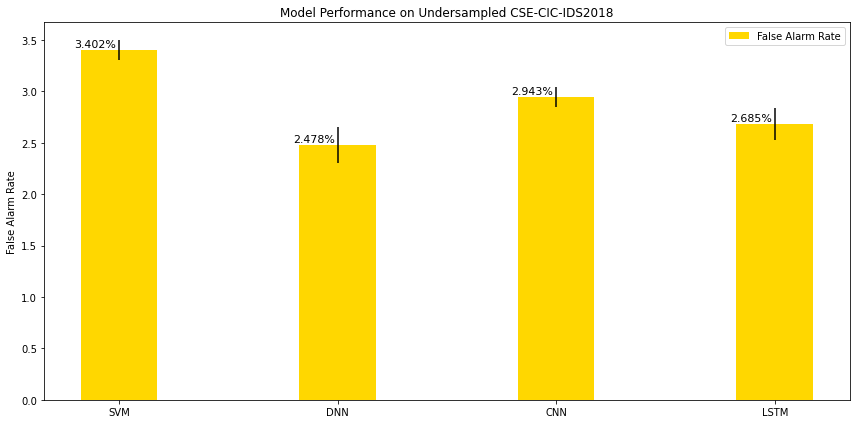

In [81]:
cic_far_means, cic_far_std = (round(cic_svm.far[0]*100,3),round(cic_dnn.far[0]*100,3), round(cic_cnn.far[0]*100,3), round(cic_lstm.far[0]*100,3)), \
                     (cic_svm.far[1]*100, cic_dnn.far[1]*100, cic_cnn.far[1]*100, cic_lstm.far[1]*100)

    
ind = np.arange(len(cic_far_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind, cic_far_means, width, yerr=cic_far_std,
                label='False Alarm Rate', color='gold')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('False Alarm Rate')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('SVM','DNN', 'CNN', 'LSTM'))
ax.legend()

autolabel(rects1, "left")
fig.tight_layout()

#plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("far_cic.pdf")
plt.show()

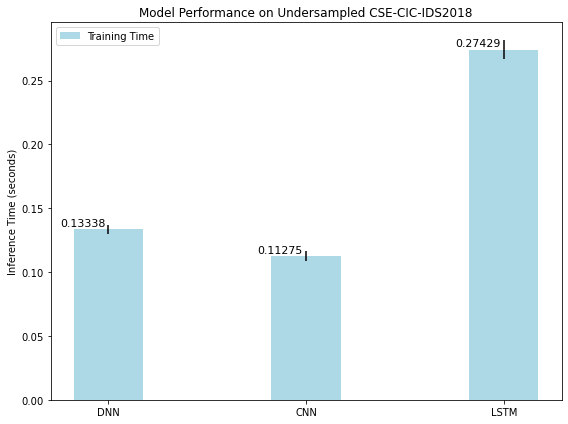

In [87]:
train_time_means, train_time_std = (round(cic_dnn.train_time[0],5), round(cic_cnn.train_time[0],5), round(cic_lstm.train_time[0],5)), \
                     (cic_dnn.train_time[1], cic_cnn.train_time[1], cic_lstm.train_time[1])

    
ind = np.arange(len(train_time_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(ind, train_time_means, width, yerr=train_time_std,
                label='Training Time', color='lightblue')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('DNN', 'CNN', 'LSTM'))
ax.legend()

autolabel(rects1, "left",perc=False)
fig.tight_layout()

#plt.ylim(70,90)
plt.legend(loc=2)
#plt.xlabel("Model")
plt.savefig("train_time_cic.pdf")

plt.show()

In [ ]:
test_time_means, test_time_std = (round(cic_dnn.test_time[0],5), round(cic_cnn.test_time[0],5), round(cic_lstm.test_time[0],5)), \
                     (cic_dnn.test_time[1], cic_cnn.test_time[1], cic_lstm.test_time[1])

    
ind = np.arange(len(test_time_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(8,6))
rects1 = ax.bar(ind, test_time_means, width, yerr=test_time_std,
                label='Inference Time', color='maroon')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Inference Time (seconds)')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('DNN', 'CNN', 'LSTM'))
ax.legend()

autolabel(rects1, "left",perc=False)
fig.tight_layout()

#plt.ylim(70,90)
plt.legend(loc=2)
#plt.xlabel("Model")
plt.savefig("test_time_cic.pdf")

plt.show()

## AutoEncoder for dimensionality reduction

In [69]:
cic_ae_dnn = DNN(X=cic_X, y = cic_y, split=True, ae=True, ae_dim=64, ae_train_perc= 0.25)
cic_ae_dnn.evaluate_model(5,[64,32,16],time=True)

Training Model 0 ...


2021-11-09 23:20:27.881740: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:28.631213: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:29.074769: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:29.490750: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:42.539529: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:43.290888: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:43.696606: I tensorflow/core/grappler/optimizers/cust

Evaluating Model 0 ...


2021-11-09 23:20:56.480531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.8254620123203286
Training Model 1 ...


2021-11-09 23:20:56.798519: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:57.549432: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:57.971777: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:20:58.338877: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:09.497655: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:10.259526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:10.671934: I tensorflow/core/grappler/optimizers/cust

Evaluating Model 1 ...


2021-11-09 23:21:25.538114: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.8264887063655031
Training Model 2 ...


2021-11-09 23:21:25.849989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:26.597455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:27.033868: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:27.428985: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:39.526723: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:40.268588: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:40.690729: I tensorflow/core/grappler/optimizers/cust

Evaluating Model 2 ...


2021-11-09 23:21:54.033434: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 2 Acc: 0.8116016427104723
Training Model 3 ...


2021-11-09 23:21:54.350989: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:55.097478: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:55.508582: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:21:55.860486: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:08.246317: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:08.976719: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:09.632164: I tensorflow/core/grappler/optimizers/cust

Evaluating Model 3 ...


2021-11-09 23:22:22.539440: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.8121149897330595
Training Model 4 ...


2021-11-09 23:22:22.859657: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:23.598531: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:24.009021: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:24.352430: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:35.006677: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:35.741061: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 23:22:36.134749: I tensorflow/core/grappler/optimizers/cust

Evaluating Model 4 ...


2021-11-09 23:22:47.864739: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.8198151950718686


In [26]:
cic_ae_cnn = CNN(X=cic_X, y = cic_y, split=True,image_dim=8, ae=True, ae_dim=64, ae_train_perc= 0.25)
cic_ae_cnn.evaluate_model(5, time=True)

Training Model 0 ...


2021-11-09 21:48:49.480763: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:48:50.287905: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:48:50.618260: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:48:51.118727: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 0 ...
Model 0 Acc: 0.8249486652977412
Training Model 1 ...


2021-11-09 21:49:01.721865: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:01.925827: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:02.692548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:03.023836: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:03.252731: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 1 ...
Model 1 Acc: 0.8572895277207392
Training Model 2 ...


2021-11-09 21:49:12.236303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:12.436596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:13.267377: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:13.628460: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:13.866772: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 2 ...
Model 2 Acc: 0.8341889117043121
Training Model 3 ...


2021-11-09 21:49:24.170788: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:24.376547: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:25.119765: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:25.442916: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:25.667025: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 3 ...


2021-11-09 21:49:33.968331: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.8074948665297741
Training Model 4 ...


2021-11-09 21:49:34.243596: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:34.981876: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:35.316040: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:35.541455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Evaluating Model 4 ...
Model 4 Acc: 0.8305954825462012


2021-11-09 21:49:44.280937: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [27]:
cic_ae_svm = SVM(cic_X,cic_y,split=True, ae = True, ae_dim=64,ae_train_perc=0.25)
cic_ae_svm.evaluate(5,time=True)

2021-11-09 21:49:44.489584: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:45.225571: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 0 Acc: 0.7962012320328542


2021-11-09 21:49:46.254275: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:46.981480: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 1 Acc: 0.7962012320328542


2021-11-09 21:49:48.564117: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:49.305548: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 2 Acc: 0.7879876796714579


2021-11-09 21:49:50.241265: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:50.990137: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 3 Acc: 0.7967145790554415


2021-11-09 21:49:52.005358: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-11-09 21:49:52.736234: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


Model 4 Acc: 0.7874743326488707


## Comparison with original model performance on CSE-CIC-IDS2018

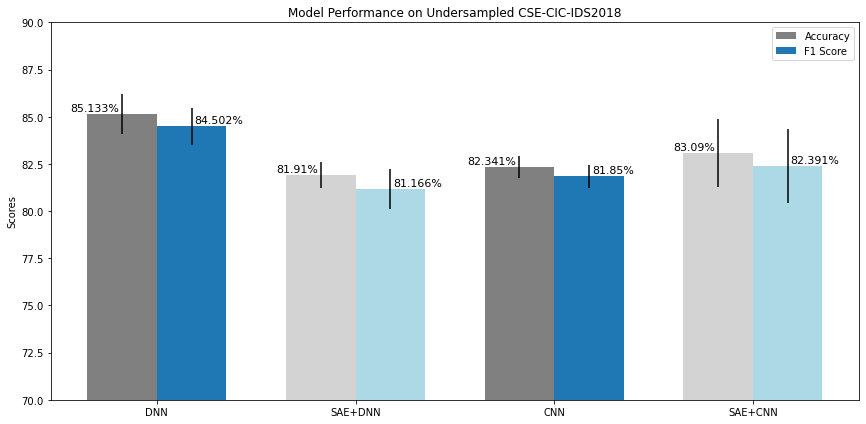

In [88]:
acc_means, acc_std = (round(cic_dnn.acc[0]*100,3), round(cic_ae_dnn.acc[0]*100,3), round(cic_cnn.acc[0]*100,3),round(cic_ae_cnn.acc[0]*100,3) ), \
                     (cic_dnn.acc[1]*100, cic_ae_dnn.acc[1]*100, cic_cnn.acc[1]*100, cic_ae_cnn.acc[1]*100)
    
f1_means, f1_std =   (round(cic_dnn.f1[0]*100,3), round(cic_ae_dnn.f1[0]*100,3), round(cic_cnn.f1[0]*100,3),round(cic_ae_cnn.f1[0]*100,3) ), \
                     (cic_dnn.f1[1]*100, cic_ae_dnn.f1[1]*100, cic_cnn.f1[1]*100, cic_ae_cnn.f1[1]*100)

    
ind = np.arange(len(acc_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind - width/2, acc_means, width, yerr=acc_std,
                label="Accuracy", color=['grey','lightgrey','grey','lightgrey'])
rects2 = ax.bar(ind + width/2, f1_means, width, yerr=f1_std,
                label='F1 Score', color = ['#1F77B4','lightblue','#1F77B4','lightblue'])

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('DNN', 'SAE+DNN', 'CNN','SAE+CNN'))
ax.legend()

autolabel(rects1, "left")
autolabel(rects2, "right")

fig.tight_layout()


plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("ae_acc_f1_cic.pdf")
plt.show()

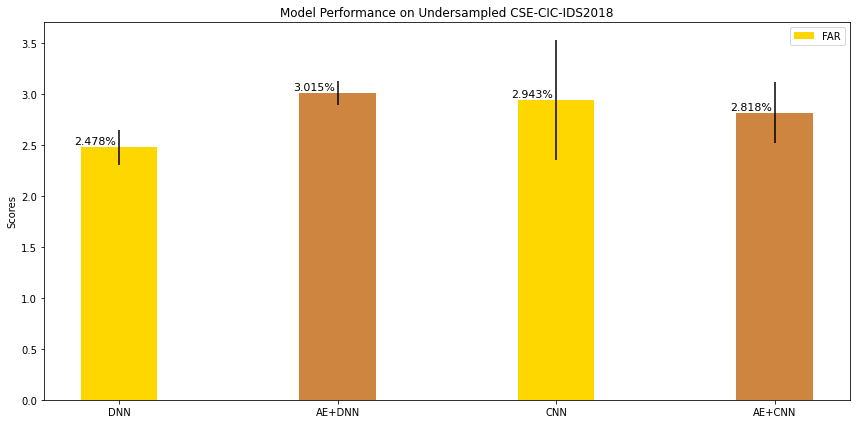

In [89]:
far_means, far_std = (round(cic_dnn.far[0]*100,3), round(cic_ae_dnn.far[0]*100,3), round(cic_cnn.far[0]*100,3),round(cic_ae_cnn.far[0]*100,3) ), \
                     (cic_dnn.far[1]*100, cic_ae_dnn.far[1]*100, cic_cnn.far[1]*100, cic_ae_cnn.far[1]*100)
    

    
ind = np.arange(len(far_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind , far_means, width, yerr=far_std,
                label='FAR', color=['gold','peru','gold','peru'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('DNN', 'AE+DNN', 'CNN','AE+CNN'))
ax.legend()

autolabel(rects1, "left")


fig.tight_layout()


#plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig(f"ae_far_cic.pdf")
plt.show()

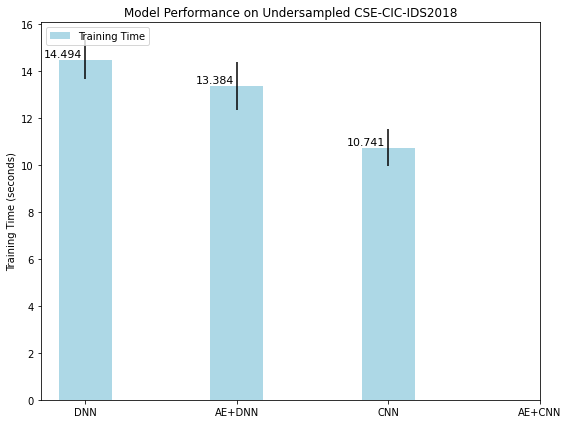

In [90]:
train_time_means, train_time_std = (round(cic_dnn.train_time[0]*100,3), round(cic_ae_dnn.train_time[0]*100,3), round(cic_cnn.train_time[0]*100,3),round(cic_ae_cnn.train_time[0]*100,3) ), \
                     (cic_dnn.train_time[1]*100, cic_ae_dnn.train_time[1]*100, cic_cnn.train_time[1]*100, cic_ae_cnn.train_time[1]*100)
    

    
ind = np.arange(len(train_time_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind , train_time_means, width, yerr=train_time_std,
                label='Training Time', color=['lightblue','teal','lightblue','teal'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('DNN', 'AE+DNN', 'CNN','AE+CNN'))
ax.legend()

autolabel(rects1, "left")


fig.tight_layout()


#plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("ae_train_time_cic.pdf")
plt.show()

In [ ]:
test_time_means, test_time_std = (round(cic_dnn.test_time[0]*100,3), round(cic_ae_dnn.test_time[0]*100,3), round(cic_cnn.test_time[0]*100,3),round(cic_ae_cnn.test_time[0]*100,3) ), \
                     (cic_dnn.test_time[1]*100, cic_ae_dnn.test_time[1]*100, cic_cnn.test_time[1]*100, cic_ae_cnn.test_time[1]*100)
    

    
ind = np.arange(len(test_time_means))  # the x locations for the groups
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(12,6))
rects1 = ax.bar(ind , test_time_means, width, yerr=test_time_std,
                label='Training Time', color=['lightblue','teal','lightblue','teal'])


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Training Time (seconds)')
ax.set_title('Model Performance on Undersampled CSE-CIC-IDS2018')
ax.set_xticks(ind)
ax.set_xticklabels(('DNN', 'AE+DNN', 'CNN','AE+CNN'))
ax.legend()

autolabel(rects1, "left")

fig.tight_layout()

#plt.ylim(70,90)
plt.legend(bbox_to_anchor=(1,1))
plt.savefig("ae_test_time_cic.pdf")
plt.show()